# Lab 7 - DBSCAN

Manojkumar V K
CB.EN.U4CSE17040


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data

In [2]:
iris_data = pd.read_csv('iris.data.csv',header=None)
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
iris_y = iris_data[4].values

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score

## Data Cleaning and Preparation

In [5]:
le = LabelEncoder()
iris_y = le.fit_transform(iris_y)
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

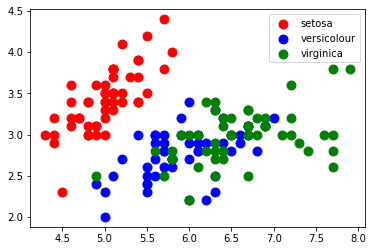

In [6]:
plt.scatter(iris_X[iris_y == 0, 0], iris_X[iris_y == 0, 1], s = 80, c = 'red', label = 'setosa')
plt.scatter(iris_X[iris_y == 1, 0], iris_X[iris_y == 1, 1], s = 80, c = 'blue', label = 'versicolour')
plt.scatter(iris_X[iris_y == 2, 0], iris_X[iris_y == 2, 1], s = 80, c = 'green', label = 'virginica')
plt.legend()

## Model Building using DBSCAN 

In [7]:
db = DBSCAN(eps=0.8, min_samples=19)

In [8]:
model = db.fit(iris_X)
pred = model.labels_

### Plotting the results
Without reducing dimensions of the input features

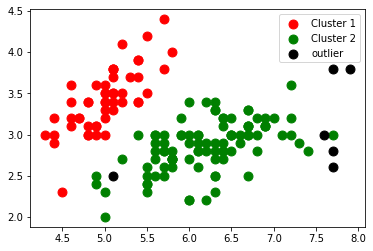

In [9]:
plt.scatter(iris_X[pred == 0, 0], iris_X[pred == 0, 1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(iris_X[pred == 1, 0], iris_X[pred == 1, 1], s = 80, c = 'green', label = 'Cluster 2')
plt.scatter(iris_X[pred == -1, 0], iris_X[pred == -1, 1], s = 80, c = 'black', label = 'outlier')
plt.legend()

### Plotting the results
After reducing dimensions of the input features

In [10]:
X=PCA(n_components=2).fit(iris_X)
X=X.transform(iris_X)

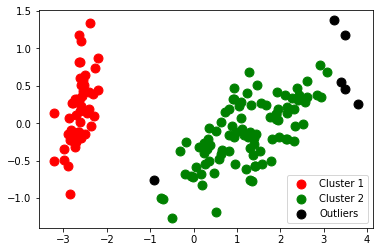

In [11]:
for i in range(0, X.shape[0]):
    if pred[i] == 0:
        p1 = plt.scatter(X[i, 0], X[i, 1], s = 80, c = 'red')
    elif pred[i] == 1:
        p2 = plt.scatter(X[i, 0], X[i, 1], s = 80, c = 'green')
    else:
        p3 = plt.scatter(X[i, 0], X[i, 1], s = 80, c = 'black')
plt.legend([p1,p2,p3],['Cluster 1', 'Cluster 2', 'Outliers'])
plt.show()

## Final Analysis

1. What is the inference from the clusters formed?
    
    *The two clusters formed, denote that the items in the two clusters share similar properties. i.e. every point in the cluster lies within 0.5 units (Euclidean distance)*


2. Find the clustering parameters
    
    *The main parameters for dbscan clustering algorithm are epsilon and minPts. However, there are other parameters like the metric used, metric parameters, the algorithm to be used by NearestNeighbour, leaf size,  power of the Minkowski metric (if used), and number of parallel jobs to run*


3. Can we use DBSCAN for Outlier detection?
    
    *DBSCAN is  not an outlier detection method per-se. However, we can still use DBSCAN as an outlier detection algorithm becuase points that do not belong to any cluster get their own class: -1.*
    

In [12]:
n_clusters_ = len(set(pred)) - (1 if -1 in pred else 0)
n_noise_ = list(pred).count(-1)

In [13]:
print('Estimated number of clusters     : %d' % n_clusters_)
print('Estimated number of noise points : %d' % n_noise_)
print("Homogeneity                      : %0.3f" %  homogeneity_score(iris_y, pred))
print("Completeness                     : %0.3f" %  completeness_score(iris_y, pred))
print("V-measure                        : %0.3f" %  v_measure_score(iris_y, pred))
print("Adjusted Rand Index              : %0.3f" %  adjusted_rand_score(iris_y, pred))
print("Adjusted Mutual Information      : %0.3f" %  adjusted_mutual_info_score(iris_y, pred))
print("Silhouette Coefficient           : %0.3f" %  silhouette_score(iris_X, pred))

Estimated number of clusters     : 2
Estimated number of noise points : 6
Homogeneity                      : 0.589
Completeness                     : 0.821
V-measure                        : 0.686
Adjusted Rand Index              : 0.556
Adjusted Mutual Information      : 0.681
Silhouette Coefficient           : 0.548
